In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import load_boston

In [7]:
data = load_boston()

In [10]:
x = data.data
y = data.target

In [50]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [13]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(100)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [20]:
y_pred.shape

(102,)

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

10.416657392156859

In [22]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle=False)


In [25]:
error = []
for train_index,test_index in kfold.split(x):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]

    x_train = x_train.reshape(-1, 1) if len(x_train.shape) == 1 else x_train
    x_test = x_test.reshape(-1, 1) if len(x_test.shape) == 1 else x_test

    rf = RandomForestRegressor(100)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    error.append(mean_squared_error(y_test,y_pred))

In [26]:
error

[8.46077398039214,
 12.650721792079223,
 21.354105643564324,
 47.434081970297,
 18.444470881188114]

In [28]:
# Get feature importances
importances = rf.feature_importances_

# Get the names of the features
feature_names = data.feature_names

# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance score
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)

    Feature  Importance
5        RM    0.595921
12    LSTAT    0.205988
7       DIS    0.068363
0      CRIM    0.052239
9       TAX    0.017316
10  PTRATIO    0.016168
6       AGE    0.010414
4       NOX    0.010291
2     INDUS    0.008161
11        B    0.007781
8       RAD    0.004895
3      CHAS    0.001336
1        ZN    0.001127


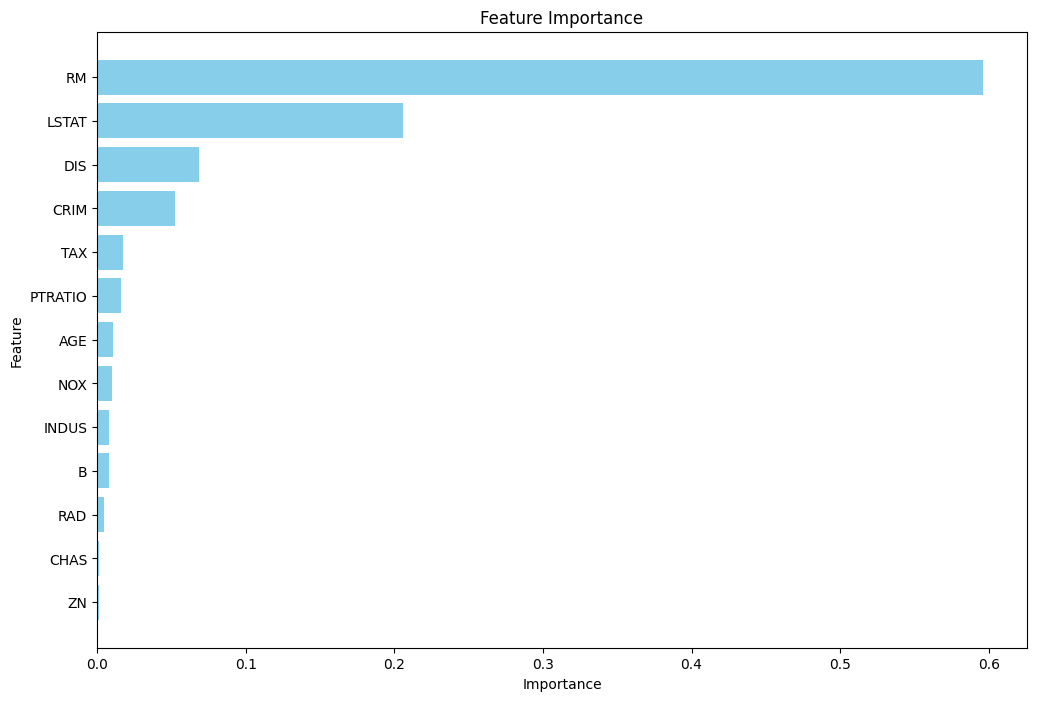

In [33]:
import matplotlib.pyplot as plt

# Assuming 'feature_importances' is your DataFrame containing feature names and their importance

# Sort the DataFrame by importance score
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create bar plot
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')

# Invert the y-axis to have the highest importance at the top
plt.gca().invert_yaxis()

# Set labels
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Show the plot
plt.show()

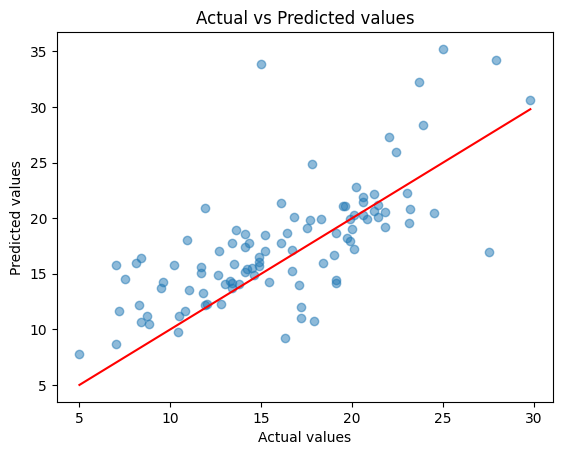

In [34]:
# Generate predictions on the test set
y_pred = rf.predict(x_test)

# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

# Add a line for perfect correlation. Note this is not a "best fit" line, 
# but rather a line representing a perfect prediction.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

In [43]:
from sklearn.datasets import load_wine

In [45]:
data = load_wine()

In [46]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(5)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [47]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [48]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()

# The target variable is stored in the 'target' attribute
target = wine.target

# The names of the target classes are stored in the 'target_names' attribute
target_names = wine.target_names

print("Target variable:", target)
print("Target names:", target_names)

Target variable: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Target names: ['class_0' 'class_1' 'class_2']


In [51]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])